In [1]:
%load_ext autoreload

In [2]:
autoreload 2

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
from scipy import stats, optimize
import numpy as np
import sympy as sym

import inputs
import models
import shooting

from __future__ import division
#from sympy import init_printing

## Welcome to the Final Estimation notebook part 1! - Also known as 23/06/2015

This notebook is used to play around and tune up the code and the data so we can carry on an estimation (probably in another notebook)

In [5]:
# define some default workers skill
x, mu1, sigma1 = sym.var('x, mu1, sigma1')
skill_cdf = 1e2*(0.5 + 0.5 * sym.erf((sym.log(x) - mu1) / sym.sqrt(2 * sigma1**2)))
skill_params = {'mu1': 0, 'sigma1': 1.0}
skill_bounds = [1e-2, 8.0]

workers = inputs.Input(var=x,
                       cdf=skill_cdf,
                       params=skill_params,
                       bounds=skill_bounds,
                       )

# define some default firms
y, mu2, sigma2 = sym.var('y, mu2, sigma2')
productivity_cdf = (0.5 + 0.5 * sym.erf((sym.log(y) - mu2) / sym.sqrt(2 * sigma2**2)))
productivity_params = {'mu2': 0.0, 'sigma2': 1.0}
productivity_bounds = [1e-2, 8.0]

firms = inputs.Input(var=y,
                     cdf=productivity_cdf,
                     params=productivity_params,
                     bounds=productivity_bounds,
                     )

# define symbolic expression for CES between x and y
omega_A, sigma_A, Big_A = sym.var('omega_A, sigma_A, Big_A')
A = ((omega_A * x**((sigma_A - 1) / sigma_A) + 
     (1 - omega_A) * y**((sigma_A - 1) / sigma_A))**(sigma_A / (sigma_A - 1))) 

# define symbolic expression for Cobb-Douglas between l and r
l, r, omega_B, sigma_B = sym.var('l, r, omega_B, sigma_B')
B = l**omega_B * r**(1 - omega_B)

F = Big_A * (A * B)

F_params = {'omega_A':0.6, 'omega_B':0.8, 'sigma_A':0.9, 'Big_A':1e3}

model = models.Model('positive',
                     workers=workers,
                     firms=firms,
                     production=F,
                     params=F_params)

solver = shooting.ShootingSolver(model=model)

In [6]:
solver.solve(1000.0, tol=1e-6, number_knots=1000, integrator='lsoda', message=True)

Exhausted workers: initial guess of 500.0 for firm size is too high!
Exhausted firms: initial guess of 250.0 for firm size is too low.
Exhausted firms: initial guess of 375.0 for firm size is too low.
Exhausted workers: initial guess of 437.5 for firm size is too high!
Exhausted workers: initial guess of 406.25 for firm size is too high!
Exhausted workers: initial guess of 390.625 for firm size is too high!
Exhausted workers: initial guess of 382.8125 for firm size is too high!
Exhausted workers: initial guess of 378.90625 for firm size is too high!
Exhausted firms: initial guess of 376.953125 for firm size is too low.
Exhausted firms: initial guess of 377.9296875 for firm size is too low.
Exhausted workers: initial guess of 378.41796875 for firm size is too high!
Exhausted firms: initial guess of 378.173828125 for firm size is too low.
Exhausted firms: initial guess of 378.295898438 for firm size is too low.
Exhausted workers: initial guess of 378.356933594 for firm size is too high!


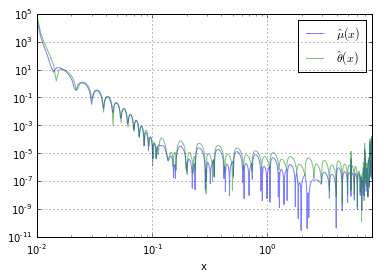

In [7]:
# Plotting the residuals
solver.residuals.plot(loglog=True, alpha=0.5)
plt.show()

In [8]:
solver.solution

,$\mu(x)$,$\theta(x)$,$w(x)$,$\pi(x)$
x,,,,
0.010000,0.010000,0.217317,10.856034,0.589800
0.017998,0.048986,2.870900,17.174727,12.326733
0.025996,0.070876,4.291741,22.904845,24.575417
0.033994,0.092355,5.703992,28.257977,40.295815
0.041992,0.113658,7.124720,33.341066,59.386441
0.049990,0.134829,8.553738,38.216062,81.722550
0.057988,0.155887,9.989430,42.923021,107.194124
0.065986,0.176843,11.430296,47.489832,135.705710
0.073984,0.197703,12.875112,51.936930,167.173449


In [22]:
# Store the results
thetas_hat = solver.solution['$\\theta(x)$'].values
ys_hat = solver.solution['$\\mu(x)$'].values
rxs = solver.solution.index.values

** Distribution time! **

In [23]:
# Sorting the thetas by size
n_thetas = dict(zip(list(map(str, range(0,1000))),thetas_hat))

import operator
sort_thetas = sorted(n_thetas.items(), key=operator.itemgetter(1))

theta_range = sorted(thetas_hat)

def pdf_workers(x):
    return 50.0*np.sqrt(2)*np.exp(-(-0.0 + np.log(x))**2/(2**2))/(np.sqrt(np.pi)*x)

pdf_x = pdf_workers(rxs)         # calculates pdf of xs in one step
n_pdf_x = dict(enumerate(pdf_x)) # creates a dictionary where the keys are the #obs of x

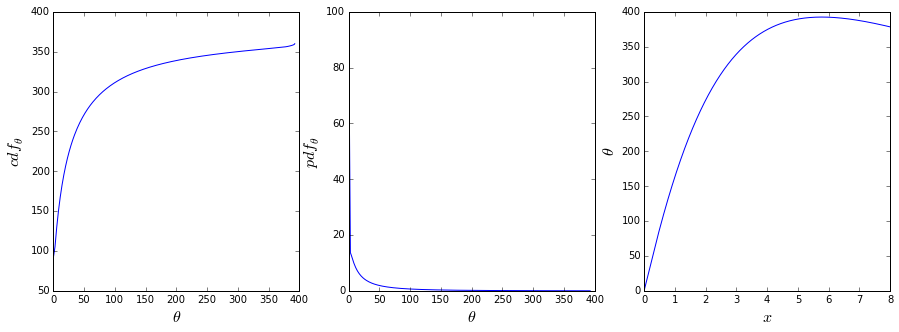

In [24]:
#Getting firm size distribution differently

pdf_theta = np.empty(0)
for pair in sort_thetas:
    index = int(pair[0])
    pdf_theta = np.hstack((pdf_theta,(n_pdf_x[index]/pair[1])))

cdf_theta = np.cumsum(pdf_theta)

#Plotting
plt.figure(figsize=(15,5))

plt.subplot(131)    
plt.plot(theta_range,cdf_theta)
plt.ylabel('$cdf_{\\theta}$', fontsize=16)
plt.xlabel('$\\theta$', fontsize=16)

plt.subplot(132)    
plt.plot(theta_range,pdf_theta)
plt.ylabel('$pdf_{\\theta}$', fontsize=16)
plt.xlabel('$\\theta$', fontsize=16)

plt.subplot(133)
plt.plot(rxs,thetas_hat)
plt.ylabel('$\\theta$', fontsize=16)
plt.xlabel('$x$', fontsize=16)

plt.show()

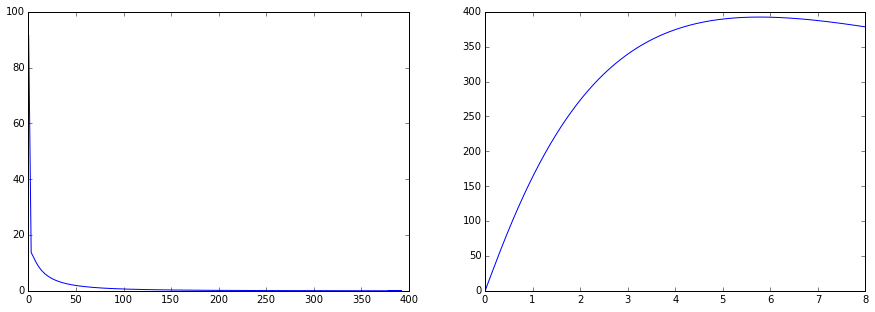

In [14]:
#Getting firm size distribution differently

def pdf_workers(x):
    return 50.0*np.sqrt(2)*np.exp(-(-0.0 + np.log(x))**2/(2**2))/(np.sqrt(np.pi)*x)
pdf_x = pdf_workers(rxs)
mysize = []
cdfsize = []
r = 0.0
#need to order by size! Why does y-axis not go up to total number of firms?
for i in range(len(rxs)):
    firm1 = pdf_x[i]/thetas_hat[i]
    r += firm1
    cdfsize.append(r)
    mysize.append(firm1)
    #print cdfsize[i]
plt.figure(figsize=(15,5))


plt.subplot(121)    
plt.plot(thetas_hat,mysize)   

plt.subplot(122)
plt.plot(rxs,thetas_hat)

plt.show()





# THIS BIT OF THE NOTEBOOK IS LOCKED UNTIL WE GET THE THREE PIECES OF THE OBJECTIVE FUNCTION:

- # SSR of $\pi$ vs $\theta$

- # SSR of $w$ vs $\theta$

- # SSR of $pdf(\theta)$ vs $\theta$


# FOR THE FINAL BIT, WE NEED:

## * Normalized $pdf(\theta)$ for the model
## * Normalized $pdf(\theta)$ for the data
## * Incorporate the code for the SSR into the estimation file

# AFTER THESE TASKS HAVE BEEN COMPLETED, YOU CAN PROCEED

In [14]:
# Starting arbitrary parameters
ps = (0.9, 0.93, 0.3)

# Reading data from csv file
theta,wage,profit,wgt = est.import_data('forestimation.csv', ID=True, weights=True)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
#skill_p = (1.0000000000000002, 0.16382221849787501)
#skill_b = [1e-2, 1.4991086434]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
#firm_p = (1.0000000000000002, 0.26979838777863219)
#firm_b = [0.0921194652671, 1.95530939088]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

# Run!
#est.ObjectiveFunction(ps, (xs, ys, thetas, ws), skill_p, skill_b, firm_p, firm_b, 2.3)

Or try the two functions individually:

In [15]:
# SolveModel
functions, new_guess = est.Solve_Model(F, F_params, workers, firms, 'positive', 6000.0, 'lsoda', 2.3)
mu_hat, theta_hat, w_hat = functions

Success! All workers and firms are matched


In [16]:
# Plotting the function vs the data (some fit better than others)
mus1 = []
ys_copy = np.sort(ys)
for i in range(len(ys_copy)):
    mus1.append(theta_hat(ys_copy[i]))
plt.plot(ys_copy, mus1, c='black')
plt.scatter(ys, thetas, c='r')
#plt.xlim(0,10)
#plt.ylim(0,500)
plt.show()

NameError: name 'ys' is not defined

In [ ]:
# Checking the mean square error - actually, the sum of squared errors of mu(x), theta(x), w(x)
est.Calculate_MSE( (xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat) )

## Iterate for some parameters

## $\omega_b$

In [18]:
h_theta = 100
results9 = np.zeros(2)
bad_result9 = np.zeros(2)
for om in np.arange(0.9,0.05,-0.05):
    params_i = {'omega_A':0.75, 'omega_B':om, 'sigma_A':0.6, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results9 = np.vstack((results9,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result9 = np.vstack((bad_result9,results_i))
        print 'Skipped error', om
        pass


Success! All workers and firms are matched
Done with 0.9
Success! All workers and firms are matched
Done with 0.85
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.4
Skipped error 0.35
Skipped error 0.3
Skipped error 0.25
Skipped error 0.2
Skipped error 0.15
Skipped error 0.1


In [19]:
h_theta = 100
results10 = np.zeros(2)
bad_result10 = np.zeros(2)
for om in np.arange(0.9,0.05,-0.05):
    params_i = {'omega_A':0.25, 'omega_B':om, 'sigma_A':0.6, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results10 = np.vstack((results10,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result10 = np.vstack((bad_result10,results_i))
        print 'Skipped error', om
        pass


Skipped error 0.9
Skipped error 0.85
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.4
Skipped error 0.35
Skipped error 0.3
Skipped error 0.25
Skipped error 0.2
Skipped error 0.15
Skipped error 0.1


In [20]:
h_theta = 100
results11 = np.zeros(2)
bad_result11 = np.zeros(2)
for om in np.arange(0.9,0.05,-0.05):
    params_i = {'omega_A':0.75, 'omega_B':om, 'sigma_A':0.3, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results11 = np.vstack((results11,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result11 = np.vstack((bad_result11,results_i))
        print 'Skipped error', om
        pass


Success! All workers and firms are matched
Done with 0.9
Success! All workers and firms are matched
Done with 0.85
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.4
Success! All workers and firms are matched
Done with 0.35
Skipped error 0.3
Skipped error 0.25
Skipped error 0.2
Skipped error 0.15
Skipped error 0.1


In [21]:
h_theta = 100
results12 = np.zeros(2)
bad_result12 = np.zeros(2)
for om in np.arange(0.9,0.05,-0.05):
    params_i = {'omega_A':0.25, 'omega_B':om, 'sigma_A':0.3, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results12 = np.vstack((results12,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result12 = np.vstack((bad_result12,results_i))
        print 'Skipped error', om
        pass


Skipped error 0.9
Skipped error 0.85
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.4
Skipped error 0.35
Skipped error 0.3
Skipped error 0.25
Skipped error 0.2
Skipped error 0.15
Skipped error 0.1


## $\omega_a$

In [37]:
h_theta = 100
results1 = np.zeros(2)
bad_result1 = np.zeros(2)
for om in np.arange(0.1,0.95,0.05):
    params_i = {'omega_A':om, 'omega_B':0.75, 'sigma_A':0.6, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results1 = np.vstack((results1,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result1 = np.vstack((bad_result1,results_i))
        print 'Skipped error', om
        pass


Success! All workers and firms are matched
Done with 0.1
Success! All workers and firms are matched
Done with 0.15
Success! All workers and firms are matched
Done with 0.2
Success! All workers and firms are matched
Done with 0.25
Success! All workers and firms are matched
Done with 0.3
Success! All workers and firms are matched
Done with 0.35
Success! All workers and firms are matched
Done with 0.4
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.85
Success! All workers and firms are matched
Done with 0.9


In [38]:
h_theta = 100
results2 = np.zeros(2)
bad_result2 = np.zeros(2)
for om in np.arange(0.1,0.95,0.05):
    params_i = {'omega_A':om, 'omega_B':0.25, 'sigma_A':0.6, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results2 = np.vstack((results2,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result2 = np.vstack((bad_result2,results_i))
        print 'Skipped error', om
        pass


Skipped error 0.1
Skipped error 0.15
Skipped error 0.2
Skipped error 0.25
Skipped error 0.3
Success! All workers and firms are matched
Done with 0.35
Skipped error 0.4
Skipped error 0.45
Skipped error 0.5
Skipped error 0.55
Skipped error 0.6
Success! All workers and firms are matched
Done with 0.65
Skipped error 0.7
Skipped error 0.75
Skipped error 0.8
Success! All workers and firms are matched
Done with 0.85
Skipped error 0.9


In [39]:
h_theta = 100
results3 = np.zeros(2)
bad_result3 = np.zeros(2)
for om in np.arange(0.1,0.95,0.05):
    params_i = {'omega_A':om, 'omega_B':0.25, 'sigma_A':0.3, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results3 = np.vstack((results3,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result3 = np.vstack((bad_result3,results_i))
        print 'Skipped error', om
        pass


Skipped error 0.1
Skipped error 0.15
Skipped error 0.2
Skipped error 0.25
Skipped error 0.3
Skipped error 0.35
Skipped error 0.4
Skipped error 0.45
Skipped error 0.5
Skipped error 0.55
Skipped error 0.6
Skipped error 0.65
Skipped error 0.7
Skipped error 0.75
Skipped error 0.8
Skipped error 0.85
Skipped error 0.9


In [40]:
h_theta = 100
results4 = np.zeros(2)
bad_result4 = np.zeros(2)
for om in np.arange(0.1,0.95,0.05):
    params_i = {'omega_A':om, 'omega_B':0.75, 'sigma_A':0.3, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results4 = np.vstack((results4,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result4 = np.vstack((bad_result4,results_i))
        print 'Skipped error', om
        pass


Success! All workers and firms are matched
Done with 0.1
Success! All workers and firms are matched
Done with 0.15
Success! All workers and firms are matched
Done with 0.2
Success! All workers and firms are matched
Done with 0.25
Success! All workers and firms are matched
Done with 0.3
Success! All workers and firms are matched
Done with 0.35
Success! All workers and firms are matched
Done with 0.4
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.85
Success! All workers and firms are matched
Done with 0.9


## $\sigma$

In [26]:
h_theta = 100
results5 = np.zeros(2)
bad_result5 = np.zeros(2)
for om in np.arange(0.9,0.05,-0.05):
    params_i = {'omega_A':0.75, 'omega_B':0.75, 'sigma_A':om, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results5 = np.vstack((results5,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result5 = np.vstack((bad_result5,results_i))
        print 'Skipped error', om
        pass


Success! All workers and firms are matched
Done with 0.9
Success! All workers and firms are matched
Done with 0.85
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.4
Success! All workers and firms are matched
Done with 0.35
Success! All workers and firms are matched
Done with 0.3
Success! All workers and firms are matched
Done with 0.25
Success! All workers and firms are matched
Done with 0.2
Success! All workers and firms are matched
Done with 0.15
Success! All workers and firms are matched
Done with 0.1


In [41]:
h_theta = 100
results6 = np.zeros(2)
bad_result6 = np.zeros(2)
for om in np.arange(0.1,0.95,0.05):
    params_i = {'omega_A':0.75, 'omega_B':0.25, 'sigma_A':om, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results6 = np.vstack((results6,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result6 = np.vstack((bad_result6,results_i))
        print 'Skipped error', om
        pass


Skipped error 0.1
Skipped error 0.15
Skipped error 0.2
Skipped error 0.25
Skipped error 0.3
Success! All workers and firms are matched
Done with 0.35
Skipped error 0.4
Skipped error 0.45
Skipped error 0.5
Skipped error 0.55
Skipped error 0.6
Skipped error 0.65
Skipped error 0.7
Skipped error 0.75
Skipped error 0.8
Skipped error 0.85
Skipped error 0.9


In [28]:
h_theta = 100
results7 = np.zeros(2)
bad_result7 = np.zeros(2)
for om in np.arange(0.9,0.05,-0.05):
    params_i = {'omega_A':0.25, 'omega_B':0.75, 'sigma_A':om, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results7 = np.vstack((results7,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result7 = np.vstack((bad_result7,results_i))
        print 'Skipped error', om
        pass


Success! All workers and firms are matched
Done with 0.9
Success! All workers and firms are matched
Done with 0.85
Success! All workers and firms are matched
Done with 0.8
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.4
Success! All workers and firms are matched
Done with 0.35
Success! All workers and firms are matched
Done with 0.3
Success! All workers and firms are matched
Done with 0.25
Success! All workers and firms are matched
Done with 0.2
Success! All workers and firms are matched
Done with 0.15
Success! All workers and firms are matched
Done with 0.1


In [44]:
h_theta = 100
results8 = np.zeros(2)
bad_result8 = np.zeros(2)
for om in np.arange(0.9,0.05,-0.05):
    params_i = {'omega_A':0.25, 'omega_B':0.4, 'sigma_A':om, 'sigma_B':1.0}
    try:
        # Solving Phase
        functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', h_theta)
        mu_hat, theta_hat, w_hat = functions
        err = (est.Calculate_MSE((xs, ys, thetas, ws), (mu_hat, theta_hat, w_hat)))
        # Storage phase
        results_i = np.hstack((om,err))        
        results8 = np.vstack((results8,results_i))
        # Update phase
        h_theta = guess
        print 'Done with', om
    except AssertionError:
        results_i = np.hstack((om,'Failure'))
        bad_result8 = np.vstack((bad_result8,results_i))
        print 'Skipped error', om
        pass


Skipped error 0.9
Success! All workers and firms are matched
Done with 0.85
Skipped error 0.8
Success! All workers and firms are matched
Done with 0.75
Success! All workers and firms are matched
Done with 0.7
Success! All workers and firms are matched
Done with 0.65
Success! All workers and firms are matched
Done with 0.6
Success! All workers and firms are matched
Done with 0.55
Success! All workers and firms are matched
Done with 0.5
Success! All workers and firms are matched
Done with 0.45
Success! All workers and firms are matched
Done with 0.4
Success! All workers and firms are matched
Done with 0.35
Success! All workers and firms are matched
Done with 0.3
Success! All workers and firms are matched
Done with 0.25
Success! All workers and firms are matched
Done with 0.2
Success! All workers and firms are matched
Done with 0.15
Success! All workers and firms are matched
Done with 0.1


In [124]:
best_pams = []
overlord = [100000000000, 0]
count = 1
for combo in All_results:
    if len(combo.ravel())==2:
        count+=1
        pass
    else:
        bestie = min(combo[1:,1])
        maker = combo[np.where(combo[:,1] == bestie)[0]]
        best_pams.append((count,maker))
        if bestie < overlord[0]:
            overlord[0] = bestie
            overlord[1] = (count, maker)
        count +=1

In [142]:
overlord[1]

(11, array([[   0.9       ,  337.51453811]]))

In [127]:
params_i = {'omega_A':0.75, 'omega_B':0.9, 'sigma_A':0.3, 'sigma_B':1.0}
functions, guess = est.Solve_Model(F, params_i, workers, firms, 'positive', 6000, 'lsoda', 100)
mu_hat, theta_hat, w_hat = functions

Success! All workers and firms are matched


In [145]:
guess

2.2901520537071285

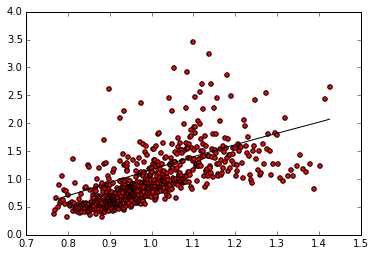

In [144]:
# Plotting the function vs the data (some fit better than others)
mus1 = []
xs_copy = np.sort(xs)
for i in range(len(xs_copy)):
    mus1.append(theta_hat(xs_copy[i]))
plt.plot(xs_copy, mus1, c='black')
plt.scatter(xs, thetas, c='r')
#plt.xlim(0.7,1.5)
#plt.ylim(0.85,1.2)
plt.show()

## Estimation

In [73]:
# Starting, arbitrary parameters
ps = (0.9, 0.9, 0.3)

# Reading data from csv file
xs, ys, thetas, ws = est.import_data('data05_normed2.csv', ID=False)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
skill_p = (1.0000000000000002, 0.16382221849787501)
skill_b = [1e-2, 1.4991086434]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
firm_p = (1.0000000000000002, 0.26979838777863219)
firm_b = [0.0921194652671, 1.95530939088]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

In [62]:
import estimation_code_norm as est

In [74]:
# Starting, arbitrary parameters
ps = (0.6,  0.75,  0.37837383, 1e2)

# Reading data from csv file
pis, thetas, ws = est.import_data2('SPA05.csv', ID=False)

# Worker skill parameters are taken from Histograms.ipynb - and correspond to log wages mean and variance
skill_p = (0.0, 1.0)
skill_b = [1e-2, 5.0]

#skill_p = (3.8894753094349528, 0.63718247398434291)
#skill_b = [0.01, 340.6127]

# Firm skill parameters are also taken from Histograms.ipynb - and correspond to log profit mean and variance (firm level)
firm_p = (0.0, 1.0)
firm_b = [1e-2, 5.0]

#firm_p = (7.13768801209, 1.92573671813)
#firm_b = [1.93, 1151284.0]

In [69]:
res = optimize.minimize(est.StubbornObjectiveFunction2, (0.9, 0.60, 0.30,90.53818477), args=((pis, thetas, ws), skill_p, skill_b, firm_p, firm_b, 6.0), method='L-BFGS-B', jac=None, hess=None, hessp=None, bounds=((1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,None),(1e-3,None)), constraints=(), tol=None, callback=None, options=None)

Success! All workers and firms are matched
84.908234379 [  0.59113953   0.55909586   0.27660712  90.53818477]
Success! All workers and firms are matched
84.9080999818 [  0.59113954   0.55909586   0.27660712  90.53818477]
Success! All workers and firms are matched
84.9077395156 [  0.59113953   0.55909587   0.27660712  90.53818477]
Success! All workers and firms are matched
84.9077487211 [  0.59113953   0.55909586   0.27660713  90.53818477]
Success! All workers and firms are matched
84.9082336416 [  0.59113953   0.55909586   0.27660712  90.53818478]
Wooops!  [  0.59114793   0.55910492   1.27660597  90.53970311] Approximated solution failed to satisfy required assortativity condition.


AssertionError: Firm size should be non-negative!

In [68]:
res

  status: 2
 success: False
    nfev: 1425
     fun: 84.906906000382605
       x: array([  0.59113953,   0.55909586,   0.27660712,  90.53818476])
 message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     jac: array([  1.23975579e+05,   8.81216357e+04,   8.91410494e+04,
        -5.17139668e+01])
     nit: 23

In [161]:
res = optimize.minimize(est.BulletProofObjectiveFunction, (0.55, 0.9, 0.3), args=((xs, ys, thetas, ws), skill_p, skill_b, firm_p, firm_b, 100.0), method='L-BFGS-B', jac=None, hess=None, hessp=None, bounds=((1e-3,1.0-1e-3),(1e-3,1.0-1e-3),(1e-3,None)), constraints=(), tol=None, callback=None, options=None)

Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched
Success! All workers and firms are matched


In [162]:
res

  status: 0
 success: True
    nfev: 15
     fun: 649.63568352502125
       x: array([ 0.55,  0.9 ,  0.3 ])
 message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     jac: array([ -3656.270178  ,  12637.01185508,   1855.53847132])
     nit: 1

### Appendix

In [ ]:
# Pottentially useful bit of code
rxs = solver.solution.index.values
rmus = solver.solution['$\\mu(x)$'].values
rthetas = solver.solution['$\\theta(x)$'].values
rws = solver.solution['$w(x)$'].values

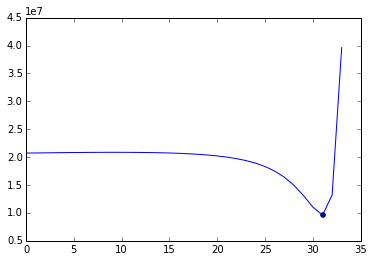

Best result: 9608553.88584 ; Omega: 0.4


In [115]:
plt.plot(results_i[:-5])
plt.xlim(0,35)
plt.scatter(results_i.index(min(results_i)), min(results_i))
plt.show()
print "Best result:",min(results_i),"; Omega:",0.4